In [1]:
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://www.tn.gov/content/dam/tn/health/documents/cedep/novel-coronavirus/datasets/Public-Dataset-Daily-County-Cases-5-18-Years.XLSX"
urllib.request.urlretrieve(url, "latest_data.xlsx")

('latest_data.xlsx', <http.client.HTTPMessage at 0x7fbff1f0efd0>)

In [3]:
#Open the latest state wide data
latest_data = pd.read_excel('latest_data.xlsx')

In [4]:
#Trim the file to just sullivan county data
sullivan_data = latest_data.query('COUNTY == "Sullivan"')

In [5]:
#Calculate date 60 days back
from datetime import date, timedelta
today = date.today() 
go_back_60_days = np.datetime64(today - timedelta(days=60))

#create a new frame that is stripped to the last 60 days
sullivan_data_60 = sullivan_data.copy()
sullivan_data_60 = sullivan_data_60[sullivan_data_60['DATE'] >= go_back_60_days]

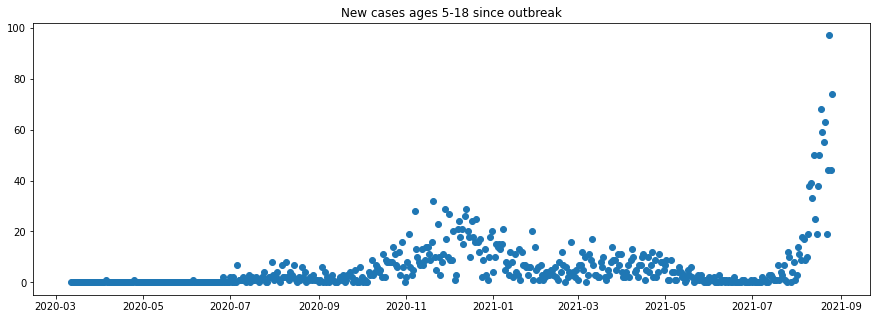

In [6]:
#Create a graph from pandemic outbreak
x = sullivan_data.DATE
y = sullivan_data.NEW_CASES
plt.figure(figsize=(15, 5))
plt.title('New cases ages 5-18 since outbreak')
plt.scatter(x,y)
plt.show()

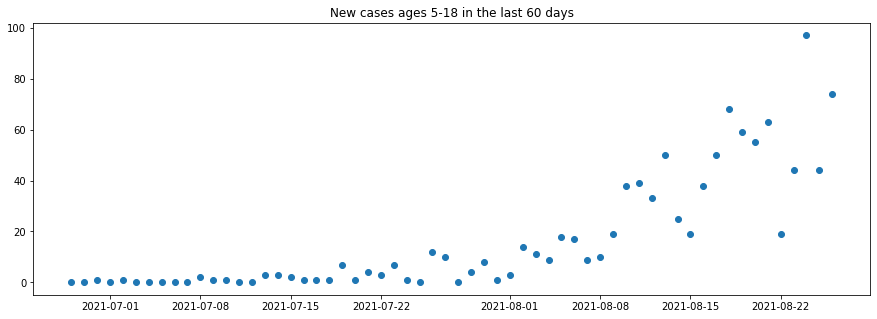

In [7]:
#Create a graph of the last 60 days
x = sullivan_data_60.DATE
y = sullivan_data_60.NEW_CASES
plt.figure(figsize=(15, 5))
plt.title('New cases ages 5-18 in the last 60 days')
plt.scatter(x,y)
plt.show()